In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import time


### What is Gradient Descent ?
+ Gradient descent is an optimization algorithm used to minimize the cost function $J(w, b)$ by updating the parameters $w$ and $b$ in the direction that reduces the cost the most.
### Update rule
+ In each iteraction, gradient descent performs the follwing updates:
$$
\begin{aligned}
w = w - \alpha \frac{\partial J(w,b)}{\partial w} \\
b = b - \alpha \frac{\partial J(w,b)}{\partial b}
\end{aligned}
$$
+ The gradient is defined as:
$$
J(w, b) = \frac{1}{2m} \sum_{i = 0}^{m - 1}(f_{w, b}(X^{(i)}) - y^{(i)})^2
$$
$$
\Leftrightarrow J(w, b) = \frac{1}{2m} \sum_{i = 0}^{m - 1}(wx^{(i)} + b - y^{(i)})^2
$$
+ We want to compute:
$$
    \frac{\partial J(w, b)}{\partial w}
$$
$$
    \frac{\partial J(w, b)}{\partial w} = \frac{1}{2m} \sum_{i = 0}^{m - 1} 2(wx^{(i)} + b - y^{(i)})\cdot x^{(i)}
$$
+ We want to compute:
$$
    \frac{\partial J(w, b)}{\partial b}
$$
$$
    \frac{\partial J(w, b)}{\partial b} = \frac{1}{2m} \sum_{i = 0}^{m - 1} 2(wx^{(i)} + b - y^{(i)})\cdot 1
$$




### Read data

In [119]:
file_path = 'datasets/StudentScore.xls'
df = pd.read_csv(file_path)
x = df[["reading score"]]
y = df[["writing score"]]

### Split data into training and test sets

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

### Impute missing values in input features

In [121]:
imputer = SimpleImputer(missing_values=-1.0, strategy='median')
x_train["reading score"] = imputer.fit_transform(x_train[["reading score"]])

### Compute loss function

In [122]:
def compute_loss_value(x, y, w, b = 0):
    """
    Computes the total squared error (loss) between the predicted and target values

    Args: 
        x : Input feature values
        y : Actual target values
        w : Wieght parameter for the linear model

    Returns:
        float: the sum of squared differances between the predicted and target values
    
    Designed by [Nghiem Quang Huy]
    """
    m = len(x)
    total_cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2 
    return total_cost

### Compute gradient of the cost function

In [123]:
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        dj_db += err
        dj_dw += err * x[i]
    dj_db /= m
    dj_dw /= m
    return dj_dw, dj_db

### Implement gradient descent algorithm

In [124]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w_out = w_in
    b_out = b_in
    J_history = []
    p_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w_out, b_out)
        w_out -= alpha * dj_dw
        b_out -= alpha * dj_db
        if i < 10001:
            J_history.append( cost_function(x, y, w_out , b_out))
            p_history.append([w_out, b_out])
            
    return w_out, b_out, J_history, p_history


In [125]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 0.00001
start_time = time.time()
w_final, b_final, J_hist, p_hist = gradient_descent(np.ravel(x_train), np.ravel(y_train), w_init, b_init, tmp_alpha, iterations, compute_loss_value, compute_gradient)
end_time = time.time() - start_time

In [126]:
print(np.ravel(x_train)[0])
print(w_final)
print(b_final)

72.0
0.9839940782377208
0.010928562456016878


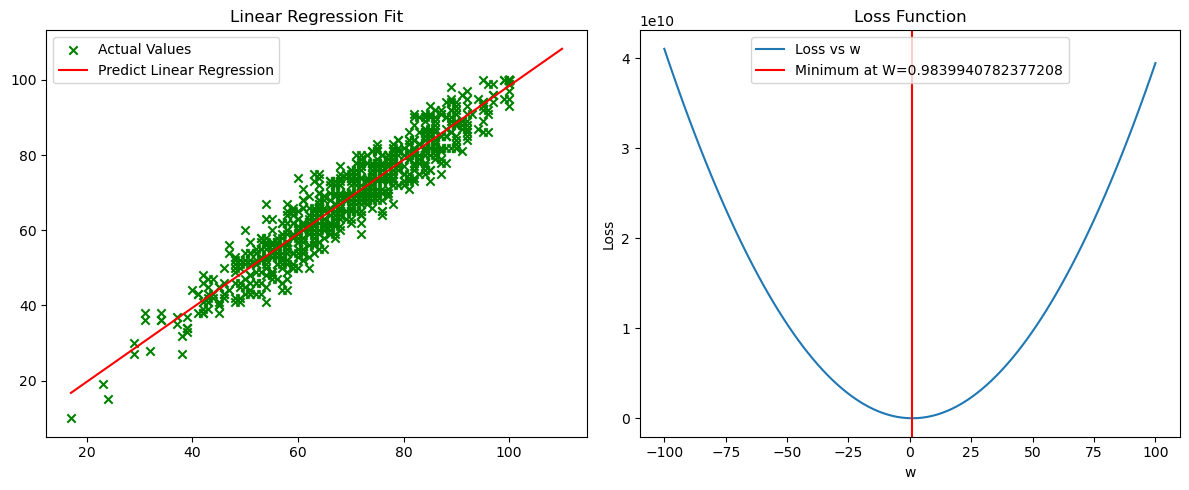

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x_plot = np.ravel(x_train)
y_plot = np.ravel(y_train)

ax1.scatter(x_plot, y_plot, marker='x', c='g', label='Actual Values')
x_line = np.linspace(np.min(x_plot), np.max(x_plot) + 10, 10)
y_line = w_final * x_line + b_final
ax1.plot(x_line, y_line, color='red', label='Predict Linear Regression')
ax1.legend()
ax1.set_title('Linear Regression Fit')


w_values = np.linspace(-100, 100, 100)
loss_values = [compute_loss_value(x_plot, y_plot, w) for w in w_values]
ax2.plot(w_values, loss_values, label='Loss vs w')
ax2.axvline(w_final, color='red', linestyle='-', label=f'Minimum at W={w_final}')
ax2.set_xlabel('w')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_title('Loss Function')

plt.tight_layout()

Text(0.5, 0, 'Iteration step')

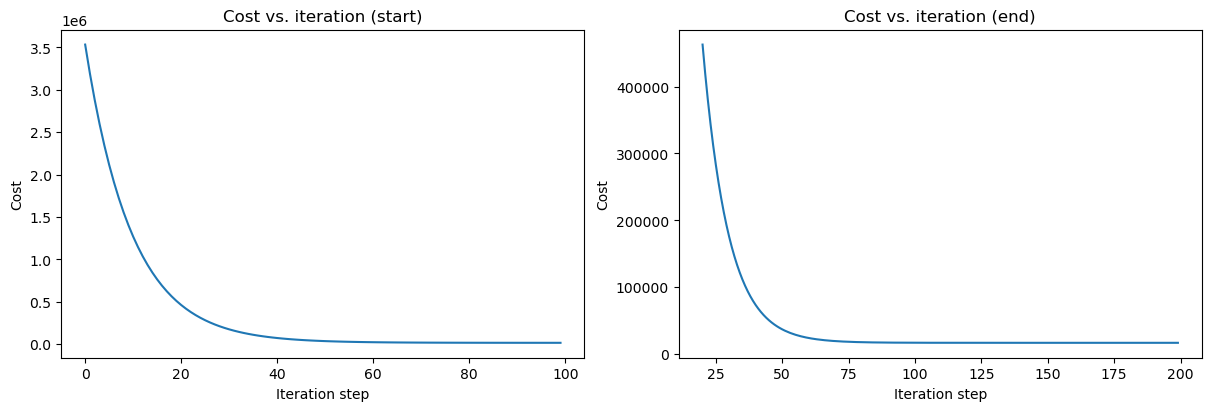

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')


ax2.plot(20 + np.arange(len(J_hist[20:200])), J_hist[20:200])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration step')


### Total loss

In [129]:
compute_loss_value(np.ravel(x_train), np.ravel(y_train), w_final, b_final)

17021.680107148964

### Execution time


In [130]:
end_time

9.725145101547241